<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Oct27-28/Clase_28_de_octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/sbailey/empca.git

Cloning into 'empca'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Receiving objects: 100% (80/80), 18.02 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random
from empca import empca

#generar 200 funciones sinusoidales con ruido

In [ ]:
#genero los datos
np.random.seed(5)

n_datos=100
n_senos=200
n_vec=3
data=np.zeros([n_datos,n_senos])

x=np.linspace(0,2*np.pi,n_senos)

for i in range(n_datos):
  for j in range (n_vec):
    c=np.random.normal()
    data[i] += 5.0*n_vec//(j+1)**2 *c *np.sin(x*(j+1))

In [ ]:
#genero el ruido

sigma = np.ones([n_datos,n_senos])
for i in range((n_datos)//10):
  sigma[i] *= 5
  sigma[i,0:n_datos//4] *= 5

pesos=1.0/sigma**2
dato_ruido=data+np.random.normal(sigma)
ndata=np.average(dato_ruido,weights=pesos,axis=0)
datos_ruidosos=dato_ruido-ndata

In [ ]:
print("EMPCA:")
EMPCA=empca.empca(datos_ruidosos,pesos,niter=20)

print("PCA:")
PCA=empca.classic_pca(datos_ruidosos)
print("R2: ",PCA.R2())

EMPCA:
       iter        R2             rchi2
EMPCA  1/20       0.04037249    117.19354029
EMPCA  2/20       0.90071204      5.83638452
EMPCA  3/20       0.95993547      0.92075218
EMPCA  4/20       0.97042150      0.90373176
EMPCA  5/20       0.97769374      0.89100839
EMPCA  6/20       0.98429630      0.88155664
EMPCA  7/20       0.98775429      0.87918680
EMPCA  8/20       0.98885674      0.87855179
EMPCA  9/20       0.98895548      0.87821547
EMPCA 10/20       0.98864244      0.87790288
EMPCA 11/20       0.98828933      0.87760423
EMPCA 12/20       0.98811363      0.87735618
EMPCA 13/20       0.98811393      0.87717334
EMPCA 14/20       0.98818542      0.87704287
EMPCA 15/20       0.98824669      0.87694345
EMPCA 16/20       0.98827221      0.87685930
EMPCA 17/20       0.98827106      0.87678364
EMPCA 18/20       0.98826094      0.87671561
EMPCA 19/20       0.98825368      0.87665614
EMPCA 20/20       0.98825240      0.87660558
R2: 0.9882543677388692
PCA:
R2:  1.0


In [ ]:
#Reconstruir espectro, hay que calcular coeficientes y vectores
def build_continuuums(meanspec,coeff,eigvec,n_vec=5):
  conti_mock= []
  for i in range(len(coeff)):
    spectram=[]
    for j in range(n_vec):
      spectram.append(coeff[i][j]*eigvec[j])
    spectrasm = np.vstack(spectram)
    specm = np.sum(spectrasm,axis=0)
    conti_mock += [specm]
  continuum_mock = np.vstack(conti_mock)
  for i in range(len(continuum_mock)):
    continuum_mock[i] += meanspec
  return continuum_mock

In [ ]:
cont_pca=build_continuuums(ndata,PCA.coeff,PCA.eigvec)

In [ ]:
+cont_empca=build_continuuums(ndata,EMPCA.coeff,EMPCA.eigvec)

PRIMER CÓDIGO

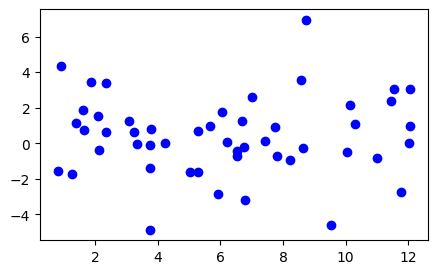

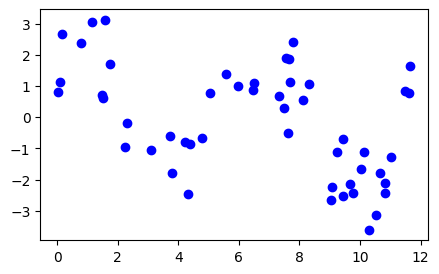

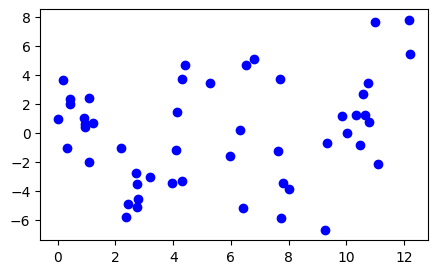

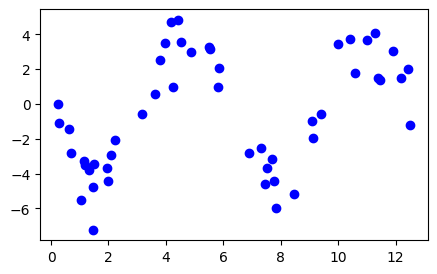

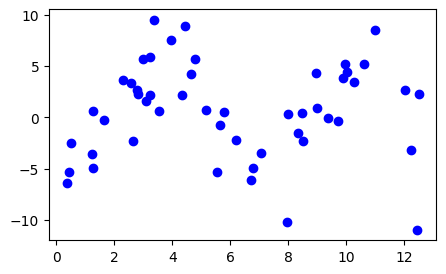

In [ ]:
len1=5
len2=50
x=np.zeros(([len1,len2]))
y=np.zeros(([len1,len2]))
ruido=np.zeros(([len1,len2]))
peso=np.zeros(([len1,len2]))
medias=np.zeros(len1)

#genero len1 senos
for i in range (len1):
  for j in range (len2):
    x[i][j]=random.uniform(0,4*np.pi)
    y[i][j]=(i+1)*np.sin(x[i][j]+i)
    #Amplitud de i+1 y fase i
  #generar ruido con una distribucion gaussiana
  ruido[i][:]=np.random.normal(0.1,random.randint(0,3),len2)
  medias[i]=np.mean(y)
  y[i][:]-=medias[i] #resto la media a los datos
  y[i][:]+=ruido[i][:] #le sumo el ruido
  peso[i][:]=1/(ruido[i][:])**2 #vector peso

  plt.figure(figsize=(5,3))
  plt.scatter(x[i][:],y[i][:],color="blue")
  plt.show()